In [1]:
import os
import dask
import dask.dataframe as dd 
import dask.multiprocessing
import json
import numpy as np
import math 
import datetime
from dask.distributed import LocalCluster, Client

In [2]:
client = Client(n_workers=3, threads_per_worker=1, processes=False)

In [3]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://192.168.31.119:8787/status,
Dashboard: http://192.168.31.119:8787/status,Workers: 3
Total threads: 3,Total memory: 7.75 GiB
Status: running,Using processes: False
Comm: inproc://192.168.31.119/6556/1,Workers: 3
Dashboard: http://192.168.31.119:8787/status,Total threads: 3
Started: Just now,Total memory: 7.75 GiB
Comm: inproc://192.168.31.119/6556/4,Total threads: 1
Dashboard: http://192.168.31.119:52233/status,Memory: 2.58 GiB
Nanny: None,


In [4]:
df = dd.read_csv(r"C:\Users\singh_new\Downloads\flights.csv\flights.csv", assume_missing=True)

In [5]:
df

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
npartitions=1,,,,,,,,,,,,,,,,,,,,,
,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,string,float64,string,string,string,float64,float64,float64,float64,string,string
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [6]:
df.compute()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0.0,2013.0,1.0,1.0,517.0,515.0,2.0,830.0,819.0,11.0,...,1545.0,N14228,EWR,IAH,227.0,1400.0,5.0,15.0,2013-01-01 05:00:00,United Air Lines Inc.
1,1.0,2013.0,1.0,1.0,533.0,529.0,4.0,850.0,830.0,20.0,...,1714.0,N24211,LGA,IAH,227.0,1416.0,5.0,29.0,2013-01-01 05:00:00,United Air Lines Inc.
2,2.0,2013.0,1.0,1.0,542.0,540.0,2.0,923.0,850.0,33.0,...,1141.0,N619AA,JFK,MIA,160.0,1089.0,5.0,40.0,2013-01-01 05:00:00,American Airlines Inc.
3,3.0,2013.0,1.0,1.0,544.0,545.0,-1.0,1004.0,1022.0,-18.0,...,725.0,N804JB,JFK,BQN,183.0,1576.0,5.0,45.0,2013-01-01 05:00:00,JetBlue Airways
4,4.0,2013.0,1.0,1.0,554.0,600.0,-6.0,812.0,837.0,-25.0,...,461.0,N668DN,LGA,ATL,116.0,762.0,6.0,0.0,2013-01-01 06:00:00,Delta Air Lines Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,336771.0,2013.0,9.0,30.0,NaN,1455.0,NaN,NaN,1634.0,NaN,...,3393.0,<NA>,JFK,DCA,NaN,213.0,14.0,55.0,2013-09-30 14:00:00,Endeavor Air Inc.
336772,336772.0,2013.0,9.0,30.0,NaN,2200.0,NaN,NaN,2312.0,NaN,...,3525.0,<NA>,LGA,SYR,NaN,198.0,22.0,0.0,2013-09-30 22:00:00,Endeavor Air Inc.
336773,336773.0,2013.0,9.0,30.0,NaN,1210.0,NaN,NaN,1330.0,NaN,...,3461.0,N535MQ,LGA,BNA,NaN,764.0,12.0,10.0,2013-09-30 12:00:00,Envoy Air
336774,336774.0,2013.0,9.0,30.0,NaN,1159.0,NaN,NaN,1344.0,NaN,...,3572.0,N511MQ,LGA,CLE,NaN,419.0,11.0,59.0,2013-09-30 11:00:00,Envoy Air


In [7]:
df.head(5)

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0.0,2013.0,1.0,1.0,517.0,515.0,2.0,830.0,819.0,11.0,...,1545.0,N14228,EWR,IAH,227.0,1400.0,5.0,15.0,2013-01-01 05:00:00,United Air Lines Inc.
1,1.0,2013.0,1.0,1.0,533.0,529.0,4.0,850.0,830.0,20.0,...,1714.0,N24211,LGA,IAH,227.0,1416.0,5.0,29.0,2013-01-01 05:00:00,United Air Lines Inc.
2,2.0,2013.0,1.0,1.0,542.0,540.0,2.0,923.0,850.0,33.0,...,1141.0,N619AA,JFK,MIA,160.0,1089.0,5.0,40.0,2013-01-01 05:00:00,American Airlines Inc.
3,3.0,2013.0,1.0,1.0,544.0,545.0,-1.0,1004.0,1022.0,-18.0,...,725.0,N804JB,JFK,BQN,183.0,1576.0,5.0,45.0,2013-01-01 05:00:00,JetBlue Airways
4,4.0,2013.0,1.0,1.0,554.0,600.0,-6.0,812.0,837.0,-25.0,...,461.0,N668DN,LGA,ATL,116.0,762.0,6.0,0.0,2013-01-01 06:00:00,Delta Air Lines Inc.


In [8]:
df.dtypes

id                        float64
year                      float64
month                     float64
day                       float64
dep_time                  float64
sched_dep_time            float64
dep_delay                 float64
arr_time                  float64
sched_arr_time            float64
arr_delay                 float64
carrier           string[pyarrow]
flight                    float64
tailnum           string[pyarrow]
origin            string[pyarrow]
dest              string[pyarrow]
air_time                  float64
distance                  float64
hour                      float64
minute                    float64
time_hour         string[pyarrow]
name              string[pyarrow]
dtype: object

In [9]:
#to check for null values in the dataset

df.isnull().sum().compute()

id                   0
year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
name                 0
dtype: int64

In [10]:
df.columns

Index(['id', 'year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'time_hour', 'name'],
      dtype='object')

In [11]:
#get general info/summary about the datasert

df.describe().compute()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.000000,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,328521.000000,328063.000000,336776.000000,327346.000000,336776.000000,327346.000000,336776.000000,336776.000000,336776.000000
mean,168387.500000,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,1971.923620,150.686460,1039.912604,13.180247,26.230100
std,97219.001466,0.0,3.414457,8.768607,488.281791,467.335756,40.210061,533.264132,497.457142,44.633292,1632.471938,93.688305,733.233033,4.661316,19.300846
min,0.000000,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,1.000000,0.000000
25%,84193.750000,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-17.000000,553.000000,82.000000,502.000000,9.000000,8.000000
50%,168387.500000,2013.0,7.000000,16.000000,1401.000000,1359.000000,-2.000000,1535.000000,1556.000000,-5.000000,1496.000000,129.000000,872.000000,13.000000,29.000000
75%,252581.250000,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1945.000000,14.000000,3465.000000,192.000000,1389.000000,17.000000,44.000000
max,336775.000000,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000


In [12]:
#to see a particular column

df['carrier'].compute()

0         UA
1         UA
2         AA
3         B6
4         DL
          ..
336771    9E
336772    9E
336773    MQ
336774    MQ
336775    MQ
Name: carrier, Length: 336776, dtype: string

In [13]:
#check the number of rows and column

df.compute().shape

(336776, 21)

In [14]:
#calculate the average delay for each airline

avg_delay = df.groupby('carrier')['arr_delay'].mean().compute()

In [15]:
avg_delay

carrier
9E     7.379669
AA     0.364291
AS    -9.930889
B6     9.457973
DL     1.644341
EV    15.796431
F9    21.920705
FL    20.115906
HA    -6.915205
MQ    10.774733
OO    11.931034
UA     3.558011
US     2.129595
VX     1.764464
WN     9.649120
YV    15.556985
Name: arr_delay, dtype: float64

In [16]:
#filter flights where arrival delay is > 30 min

delay_arrival = df[df['arr_delay'] > 30]
delay_arrival.compute()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
2,2.0,2013.0,1.0,1.0,542.0,540.0,2.0,923.0,850.0,33.0,...,1141.0,N619AA,JFK,MIA,160.0,1089.0,5.0,40.0,2013-01-01 05:00:00,American Airlines Inc.
14,14.0,2013.0,1.0,1.0,559.0,600.0,-1.0,941.0,910.0,31.0,...,707.0,N3DUAA,LGA,DFW,257.0,1389.0,6.0,0.0,2013-01-01 06:00:00,American Airlines Inc.
25,25.0,2013.0,1.0,1.0,608.0,600.0,8.0,807.0,735.0,32.0,...,3768.0,N9EAMQ,EWR,ORD,139.0,719.0,6.0,0.0,2013-01-01 06:00:00,Envoy Air
42,42.0,2013.0,1.0,1.0,635.0,635.0,0.0,1028.0,940.0,48.0,...,711.0,N3GKAA,LGA,DFW,248.0,1389.0,6.0,35.0,2013-01-01 06:00:00,American Airlines Inc.
69,69.0,2013.0,1.0,1.0,702.0,700.0,2.0,1058.0,1014.0,44.0,...,671.0,N779JB,JFK,LAX,381.0,2475.0,7.0,0.0,2013-01-01 07:00:00,JetBlue Airways
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336742,336742.0,2013.0,9.0,30.0,2119.0,2005.0,74.0,2310.0,2212.0,58.0,...,4321.0,N17984,EWR,MCI,147.0,1092.0,20.0,5.0,2013-09-30 20:00:00,ExpressJet Airlines Inc.
336757,336757.0,2013.0,9.0,30.0,2159.0,1845.0,194.0,2344.0,2030.0,194.0,...,3320.0,N906XJ,JFK,BUF,50.0,301.0,18.0,45.0,2013-09-30 18:00:00,Endeavor Air Inc.
336760,336760.0,2013.0,9.0,30.0,2211.0,2059.0,72.0,2339.0,2242.0,57.0,...,4672.0,N12145,EWR,STL,120.0,872.0,20.0,59.0,2013-09-30 20:00:00,ExpressJet Airlines Inc.
336762,336762.0,2013.0,9.0,30.0,2233.0,2113.0,80.0,112.0,30.0,42.0,...,471.0,N578UA,EWR,SFO,318.0,2565.0,21.0,13.0,2013-09-30 21:00:00,United Air Lines Inc.


In [17]:
#find average delay for each destination

avg_delay_by_destination = df.groupby('dest')['dep_delay'].mean().compute()
avg_delay_by_destination

dest
ABQ    13.740157
ACK     6.456604
ALB    23.620525
ANC    12.875000
ATL    12.509824
         ...    
TPA    12.135007
TUL    34.906355
TVC    22.083333
TYS    28.493955
XNA     6.464886
Name: dep_delay, Length: 105, dtype: float64

In [18]:
#find the total number of flights for each month

flights_per_month = df.groupby('month').size().compute()
flights_per_month

month
1.0     27004
2.0     24951
3.0     28834
4.0     28330
5.0     28796
6.0     28243
7.0     29425
8.0     29327
9.0     27574
10.0    28889
11.0    27268
12.0    28135
dtype: int64

In [19]:
#find the maximum arrival delay for each month

max_delay_per_month = df.groupby('month')['arr_delay'].max().compute()
max_delay_per_month

month
1.0     1272.0
2.0      834.0
3.0      915.0
4.0      931.0
5.0      875.0
6.0     1127.0
7.0      989.0
8.0      490.0
9.0     1007.0
10.0     688.0
11.0     796.0
12.0     878.0
Name: arr_delay, dtype: float64

In [20]:
#count the number of flights per airline

flights_per_airline = df.groupby('carrier').size().compute()
flights_per_airline

carrier
9E    18460
AA    32729
AS      714
B6    54635
DL    48110
EV    54173
F9      685
FL     3260
HA      342
MQ    26397
OO       32
UA    58665
US    20536
VX     5162
WN    12275
YV      601
dtype: int64

In [21]:
#calculate the percentage of flights that arrived on time (or early) for each airline:

on_time_flights = df[df['arr_delay'] <= 0]
on_time_percentage = (on_time_flights.groupby('carrier')['flight'].count() / df.groupby('carrier')['flight'].count()) * 100
on_time_percentage.compute()

carrier
9E    57.730228
AA    64.899630
AS    72.829132
B6    55.715201
DL    64.944918
EV    49.146254
F9    42.189781
FL    39.263804
HA    71.637427
MQ    50.551199
OO    59.375000
UA    60.615358
US    60.781067
VX    65.284773
WN    54.908350
YV    47.587354
Name: flight, dtype: float64

In [22]:
#filter flights from january(month == 1) and count how many flights per day

january_flights = df[df['month'] == 1]
flights_per_day_january = january_flights.groupby('day').size().compute()
flights_per_day_january

day
1.0     842
2.0     943
3.0     914
4.0     915
5.0     720
6.0     832
7.0     933
8.0     899
9.0     902
10.0    932
11.0    930
12.0    690
13.0    828
14.0    928
15.0    894
16.0    901
17.0    927
18.0    924
19.0    674
20.0    786
21.0    912
22.0    890
23.0    897
24.0    925
25.0    922
26.0    680
27.0    823
28.0    923
29.0    890
30.0    900
31.0    928
dtype: int64

In [23]:
#find the top 5 most delayed flights by airline

top_delayed_flights = df.sort_values(by='arr_delay', ascending=False)
top_delayed_flights_per_airline = top_delayed_flights.groupby('carrier').head(5).compute()

top_delayed_flights_per_airline[['carrier','flight','arr_delay']]

,carrier,flight,arr_delay
124588,9E,3798.0,744.0
272695,9E,3538.0,458.0
259423,9E,3325.0,421.0
80528,9E,2906.0,396.0
95746,9E,2901.0,386.0
...,...,...,...
47301,YV,2693.0,381.0
247610,YV,2751.0,328.0
253214,YV,3771.0,233.0
14754,YV,3750.0,228.0


In [24]:
#monthly trends in delays (average arrival delay per month)

monthly_avg_delay = df.groupby('month')['arr_delay'].mean().compute()
monthly_avg_delay

month
1.0      6.129972
2.0      5.613019
3.0      5.807577
4.0     11.176063
5.0      3.521509
6.0     16.481330
7.0     16.711307
8.0      6.040652
9.0     -4.018364
10.0    -0.167063
11.0     0.461347
12.0    14.870355
Name: arr_delay, dtype: float64

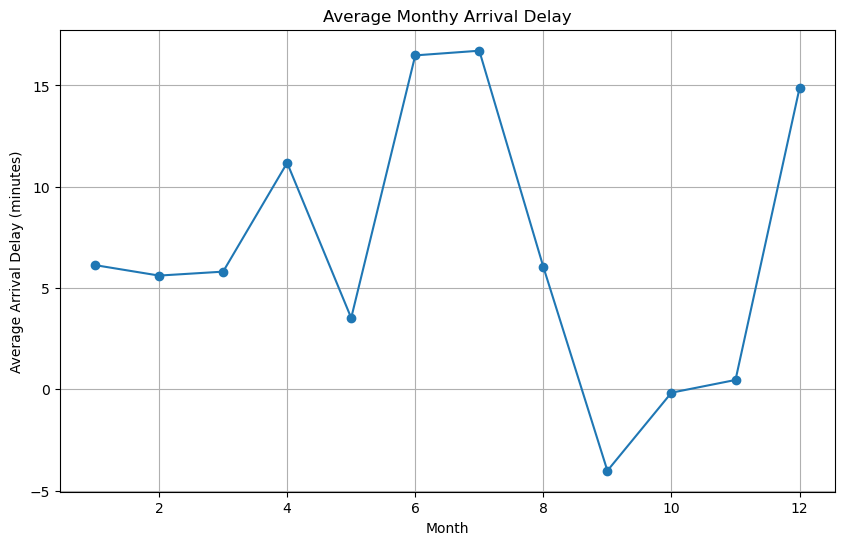

In [25]:
# Plotting the monthly trend of delays

import matplotlib.pyplot as plt

monthly_avg_delay.plot(kind='line', figsize=(10,6), marker='o')
plt.title('Average Monthy Arrival Delay')
plt.xlabel('Month')
plt.ylabel('Average Arrival Delay (minutes)')
plt.grid(True)
plt.show()

In [26]:
#identify the top 10 airports by the number of departing flights.

busiest_airports = df['origin'].value_counts().nlargest(10).compute()
busiest_airports

2025-03-24 14:51:41,657 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle 9da839059807befb11f6e14d4daa1fb7 initialized by task ('shuffle-transfer-9da839059807befb11f6e14d4daa1fb7', 0) executed on worker inproc://192.168.31.119/6556/8
2025-03-24 14:51:43,855 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle 9da839059807befb11f6e14d4daa1fb7 deactivated due to stimulus 'task-finished-1742808103.8486638'


origin
EWR    120835
JFK    111279
LGA    104662
Name: count, dtype: int64[pyarrow]

In [27]:
#top 10 airports with most  the most delayed flights

top_delayed_airports = df.groupby('dest')['arr_delay'].sum().compute()
top_10_delayed_airports = top_delayed_airports.nlargest(10)
top_10_delayed_airports

dest
ATL    190260.0
CLT    100645.0
ORD     97352.0
FLL     96153.0
DCA     82609.0
RDU     78107.0
MCO     76185.0
IAD     74631.0
BNA     71867.0
DEN     61700.0
Name: arr_delay, dtype: float64

In [28]:
# find the flights with the longest departure delays:

longest_delays = df.nlargest(10, 'dep_delay').compute()
longest_delays

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
7072,7072.0,2013.0,1.0,9.0,641.0,900.0,1301.0,1242.0,1530.0,1272.0,...,51.0,N384HA,JFK,HNL,640.0,4983.0,9.0,0.0,2013-01-09 09:00:00,Hawaiian Airlines Inc.
235778,235778.0,2013.0,6.0,15.0,1432.0,1935.0,1137.0,1607.0,2120.0,1127.0,...,3535.0,N504MQ,JFK,CMH,74.0,483.0,19.0,35.0,2013-06-15 19:00:00,Envoy Air
8239,8239.0,2013.0,1.0,10.0,1121.0,1635.0,1126.0,1239.0,1810.0,1109.0,...,3695.0,N517MQ,EWR,ORD,111.0,719.0,16.0,35.0,2013-01-10 16:00:00,Envoy Air
327043,327043.0,2013.0,9.0,20.0,1139.0,1845.0,1014.0,1457.0,2210.0,1007.0,...,177.0,N338AA,JFK,SFO,354.0,2586.0,18.0,45.0,2013-09-20 18:00:00,American Airlines Inc.
270376,270376.0,2013.0,7.0,22.0,845.0,1600.0,1005.0,1044.0,1815.0,989.0,...,3075.0,N665MQ,JFK,CVG,96.0,589.0,16.0,0.0,2013-07-22 16:00:00,Envoy Air
173992,173992.0,2013.0,4.0,10.0,1100.0,1900.0,960.0,1342.0,2211.0,931.0,...,2391.0,N959DL,JFK,TPA,139.0,1005.0,19.0,0.0,2013-04-10 19:00:00,Delta Air Lines Inc.
151974,151974.0,2013.0,3.0,17.0,2321.0,810.0,911.0,135.0,1020.0,915.0,...,2119.0,N927DA,LGA,MSP,167.0,1020.0,8.0,10.0,2013-03-17 08:00:00,Delta Air Lines Inc.
247040,247040.0,2013.0,6.0,27.0,959.0,1900.0,899.0,1236.0,2226.0,850.0,...,2007.0,N3762Y,JFK,PDX,313.0,2454.0,19.0,0.0,2013-06-27 19:00:00,Delta Air Lines Inc.
270987,270987.0,2013.0,7.0,22.0,2257.0,759.0,898.0,121.0,1026.0,895.0,...,2047.0,N6716C,LGA,ATL,109.0,762.0,7.0,59.0,2013-07-22 07:00:00,Delta Air Lines Inc.
87238,87238.0,2013.0,12.0,5.0,756.0,1700.0,896.0,1058.0,2020.0,878.0,...,172.0,N5DMAA,EWR,MIA,149.0,1085.0,17.0,0.0,2013-12-05 17:00:00,American Airlines Inc.


In [29]:
# Calculate the correlation between departure delay and arrival delay

correlation = df[['dep_delay','arr_delay']].corr().compute()
correlation

C:\Users\singh_new\anaconda3\Lib\site-packages\numpy\lib\function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
C:\Users\singh_new\anaconda3\Lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
C:\Users\singh_new\anaconda3\Lib\site-packages\pandas\core\frame.py:11211: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
C:\Users\singh_new\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\singh_new\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


,dep_delay,arr_delay
dep_delay,1.000000,0.914803
arr_delay,0.914803,1.000000


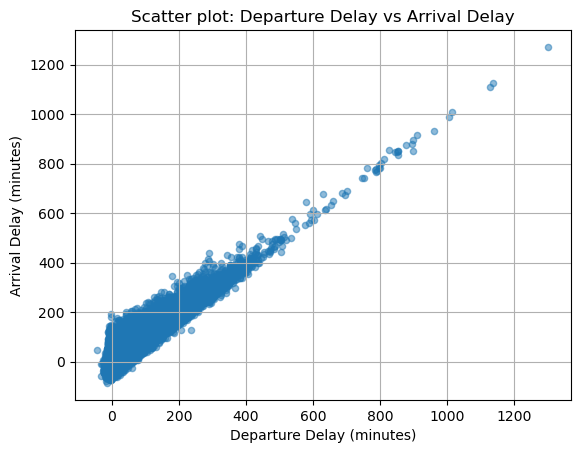

In [30]:
# plot the correlation for a better understanding
df[['dep_delay', 'arr_delay']].compute().plot(kind='scatter', x='dep_delay', y='arr_delay', alpha=0.5)
plt.title('Scatter plot: Departure Delay vs Arrival Delay')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Arrival Delay (minutes)')
plt.grid(True)
plt.show()

In [31]:
#analyze routes with most delays(for e.g., where delay > 15 minutes)

df['route'] = df['origin'] + '->' + df['dest']
top_delayed_routes = df[df['dep_delay'] > 15].groupby('route')['flight'].count().nlargest(10).compute()
top_delayed_routes

route
LGA->ATL    1896
JFK->LAX    1782
LGA->ORD    1626
JFK->SFO    1456
EWR->ORD    1393
EWR->SFO    1252
JFK->BOS    1178
EWR->BOS    1144
JFK->MCO    1105
EWR->ATL    1099
Name: flight, dtype: int64

In [32]:
month_map = {
    1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September',
    10:'October', 11:'November', 12:'December'
}

df['month_name'] = df['month'].map(month_map, meta=('month_name','object'))

df[['month','month_name']].head()

,month,month_name
0,1.0,January
1,1.0,January
2,1.0,January
3,1.0,January
4,1.0,January


In [33]:
df.compute()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,origin,dest,air_time,distance,hour,minute,time_hour,name,route,month_name
0,0.0,2013.0,1.0,1.0,517.0,515.0,2.0,830.0,819.0,11.0,...,EWR,IAH,227.0,1400.0,5.0,15.0,2013-01-01 05:00:00,United Air Lines Inc.,EWR->IAH,January
1,1.0,2013.0,1.0,1.0,533.0,529.0,4.0,850.0,830.0,20.0,...,LGA,IAH,227.0,1416.0,5.0,29.0,2013-01-01 05:00:00,United Air Lines Inc.,LGA->IAH,January
2,2.0,2013.0,1.0,1.0,542.0,540.0,2.0,923.0,850.0,33.0,...,JFK,MIA,160.0,1089.0,5.0,40.0,2013-01-01 05:00:00,American Airlines Inc.,JFK->MIA,January
3,3.0,2013.0,1.0,1.0,544.0,545.0,-1.0,1004.0,1022.0,-18.0,...,JFK,BQN,183.0,1576.0,5.0,45.0,2013-01-01 05:00:00,JetBlue Airways,JFK->BQN,January
4,4.0,2013.0,1.0,1.0,554.0,600.0,-6.0,812.0,837.0,-25.0,...,LGA,ATL,116.0,762.0,6.0,0.0,2013-01-01 06:00:00,Delta Air Lines Inc.,LGA->ATL,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,336771.0,2013.0,9.0,30.0,NaN,1455.0,NaN,NaN,1634.0,NaN,...,JFK,DCA,NaN,213.0,14.0,55.0,2013-09-30 14:00:00,Endeavor Air Inc.,JFK->DCA,September
336772,336772.0,2013.0,9.0,30.0,NaN,2200.0,NaN,NaN,2312.0,NaN,...,LGA,SYR,NaN,198.0,22.0,0.0,2013-09-30 22:00:00,Endeavor Air Inc.,LGA->SYR,September
336773,336773.0,2013.0,9.0,30.0,NaN,1210.0,NaN,NaN,1330.0,NaN,...,LGA,BNA,NaN,764.0,12.0,10.0,2013-09-30 12:00:00,Envoy Air,LGA->BNA,September
336774,336774.0,2013.0,9.0,30.0,NaN,1159.0,NaN,NaN,1344.0,NaN,...,LGA,CLE,NaN,419.0,11.0,59.0,2013-09-30 11:00:00,Envoy Air,LGA->CLE,September


# Q. which months had the most flights?

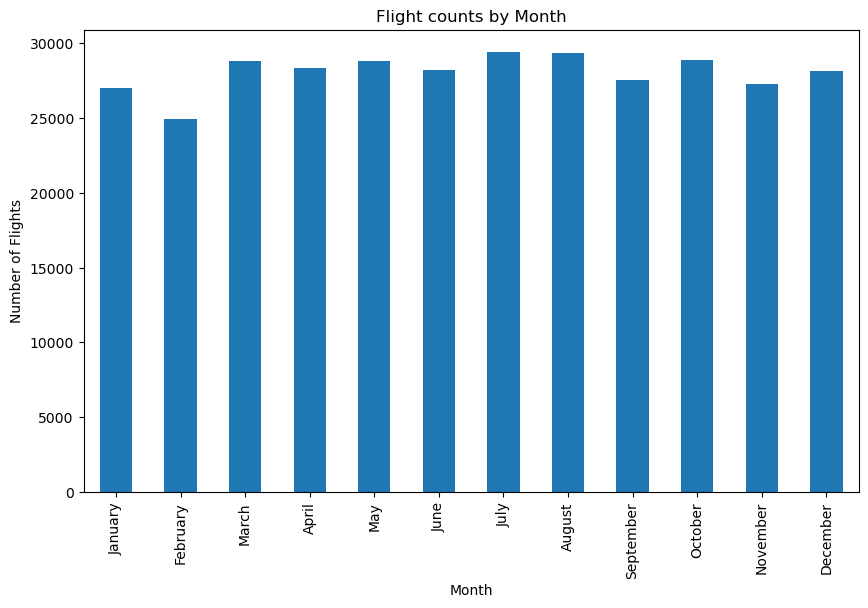

In [34]:
#visualizing the distribution of flights across months.

month_counts = df.groupby('month_name')['flight'].count().compute()
month_counts = month_counts.loc[list(month_map.values())]

plt.figure(figsize=(10,6))
month_counts.plot(kind='bar')
plt.title('Flight counts by Month')
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.show()

# Q. Do people fly more during the weekends? (Friday, Saturday, Sunday)

In [35]:
df['date'] = dd.to_datetime(df[['year','month','day']])

In [36]:
df.compute()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,dest,air_time,distance,hour,minute,time_hour,name,route,month_name,date
0,0.0,2013.0,1.0,1.0,517.0,515.0,2.0,830.0,819.0,11.0,...,IAH,227.0,1400.0,5.0,15.0,2013-01-01 05:00:00,United Air Lines Inc.,EWR->IAH,January,2013-01-01
1,1.0,2013.0,1.0,1.0,533.0,529.0,4.0,850.0,830.0,20.0,...,IAH,227.0,1416.0,5.0,29.0,2013-01-01 05:00:00,United Air Lines Inc.,LGA->IAH,January,2013-01-01
2,2.0,2013.0,1.0,1.0,542.0,540.0,2.0,923.0,850.0,33.0,...,MIA,160.0,1089.0,5.0,40.0,2013-01-01 05:00:00,American Airlines Inc.,JFK->MIA,January,2013-01-01
3,3.0,2013.0,1.0,1.0,544.0,545.0,-1.0,1004.0,1022.0,-18.0,...,BQN,183.0,1576.0,5.0,45.0,2013-01-01 05:00:00,JetBlue Airways,JFK->BQN,January,2013-01-01
4,4.0,2013.0,1.0,1.0,554.0,600.0,-6.0,812.0,837.0,-25.0,...,ATL,116.0,762.0,6.0,0.0,2013-01-01 06:00:00,Delta Air Lines Inc.,LGA->ATL,January,2013-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,336771.0,2013.0,9.0,30.0,NaN,1455.0,NaN,NaN,1634.0,NaN,...,DCA,NaN,213.0,14.0,55.0,2013-09-30 14:00:00,Endeavor Air Inc.,JFK->DCA,September,2013-09-30
336772,336772.0,2013.0,9.0,30.0,NaN,2200.0,NaN,NaN,2312.0,NaN,...,SYR,NaN,198.0,22.0,0.0,2013-09-30 22:00:00,Endeavor Air Inc.,LGA->SYR,September,2013-09-30
336773,336773.0,2013.0,9.0,30.0,NaN,1210.0,NaN,NaN,1330.0,NaN,...,BNA,NaN,764.0,12.0,10.0,2013-09-30 12:00:00,Envoy Air,LGA->BNA,September,2013-09-30
336774,336774.0,2013.0,9.0,30.0,NaN,1159.0,NaN,NaN,1344.0,NaN,...,CLE,NaN,419.0,11.0,59.0,2013-09-30 11:00:00,Envoy Air,LGA->CLE,September,2013-09-30


In [37]:
# Convert the date column and extract day of the week
df['day_of_week'] = dd.to_datetime(df['date']).dt.day_name()

In [38]:
df.compute()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,air_time,distance,hour,minute,time_hour,name,route,month_name,date,day_of_week
0,0.0,2013.0,1.0,1.0,517.0,515.0,2.0,830.0,819.0,11.0,...,227.0,1400.0,5.0,15.0,2013-01-01 05:00:00,United Air Lines Inc.,EWR->IAH,January,2013-01-01,Tuesday
1,1.0,2013.0,1.0,1.0,533.0,529.0,4.0,850.0,830.0,20.0,...,227.0,1416.0,5.0,29.0,2013-01-01 05:00:00,United Air Lines Inc.,LGA->IAH,January,2013-01-01,Tuesday
2,2.0,2013.0,1.0,1.0,542.0,540.0,2.0,923.0,850.0,33.0,...,160.0,1089.0,5.0,40.0,2013-01-01 05:00:00,American Airlines Inc.,JFK->MIA,January,2013-01-01,Tuesday
3,3.0,2013.0,1.0,1.0,544.0,545.0,-1.0,1004.0,1022.0,-18.0,...,183.0,1576.0,5.0,45.0,2013-01-01 05:00:00,JetBlue Airways,JFK->BQN,January,2013-01-01,Tuesday
4,4.0,2013.0,1.0,1.0,554.0,600.0,-6.0,812.0,837.0,-25.0,...,116.0,762.0,6.0,0.0,2013-01-01 06:00:00,Delta Air Lines Inc.,LGA->ATL,January,2013-01-01,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,336771.0,2013.0,9.0,30.0,NaN,1455.0,NaN,NaN,1634.0,NaN,...,NaN,213.0,14.0,55.0,2013-09-30 14:00:00,Endeavor Air Inc.,JFK->DCA,September,2013-09-30,Monday
336772,336772.0,2013.0,9.0,30.0,NaN,2200.0,NaN,NaN,2312.0,NaN,...,NaN,198.0,22.0,0.0,2013-09-30 22:00:00,Endeavor Air Inc.,LGA->SYR,September,2013-09-30,Monday
336773,336773.0,2013.0,9.0,30.0,NaN,1210.0,NaN,NaN,1330.0,NaN,...,NaN,764.0,12.0,10.0,2013-09-30 12:00:00,Envoy Air,LGA->BNA,September,2013-09-30,Monday
336774,336774.0,2013.0,9.0,30.0,NaN,1159.0,NaN,NaN,1344.0,NaN,...,NaN,419.0,11.0,59.0,2013-09-30 11:00:00,Envoy Air,LGA->CLE,September,2013-09-30,Monday


In [39]:
#visually representing the number of flights between weekends and weekdays.

weekdays = ['Monday','Tuesday','Wednesday','Thursday']
weekends = ['Friday','Saturday','Sunday']

df['day_type'] = df['day_of_week'].map(lambda x: 'Weekday' if x in weekdays else 'Weekend')

C:\Users\singh_new\anaconda3\Lib\site-packages\dask\dataframe\dask_expr\_collection.py:4208: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=('day_of_week', 'object'))

  warnings.warn(meta_warning(meta))


In [40]:
df.compute()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,distance,hour,minute,time_hour,name,route,month_name,date,day_of_week,day_type
0,0.0,2013.0,1.0,1.0,517.0,515.0,2.0,830.0,819.0,11.0,...,1400.0,5.0,15.0,2013-01-01 05:00:00,United Air Lines Inc.,EWR->IAH,January,2013-01-01,Tuesday,Weekday
1,1.0,2013.0,1.0,1.0,533.0,529.0,4.0,850.0,830.0,20.0,...,1416.0,5.0,29.0,2013-01-01 05:00:00,United Air Lines Inc.,LGA->IAH,January,2013-01-01,Tuesday,Weekday
2,2.0,2013.0,1.0,1.0,542.0,540.0,2.0,923.0,850.0,33.0,...,1089.0,5.0,40.0,2013-01-01 05:00:00,American Airlines Inc.,JFK->MIA,January,2013-01-01,Tuesday,Weekday
3,3.0,2013.0,1.0,1.0,544.0,545.0,-1.0,1004.0,1022.0,-18.0,...,1576.0,5.0,45.0,2013-01-01 05:00:00,JetBlue Airways,JFK->BQN,January,2013-01-01,Tuesday,Weekday
4,4.0,2013.0,1.0,1.0,554.0,600.0,-6.0,812.0,837.0,-25.0,...,762.0,6.0,0.0,2013-01-01 06:00:00,Delta Air Lines Inc.,LGA->ATL,January,2013-01-01,Tuesday,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,336771.0,2013.0,9.0,30.0,NaN,1455.0,NaN,NaN,1634.0,NaN,...,213.0,14.0,55.0,2013-09-30 14:00:00,Endeavor Air Inc.,JFK->DCA,September,2013-09-30,Monday,Weekday
336772,336772.0,2013.0,9.0,30.0,NaN,2200.0,NaN,NaN,2312.0,NaN,...,198.0,22.0,0.0,2013-09-30 22:00:00,Endeavor Air Inc.,LGA->SYR,September,2013-09-30,Monday,Weekday
336773,336773.0,2013.0,9.0,30.0,NaN,1210.0,NaN,NaN,1330.0,NaN,...,764.0,12.0,10.0,2013-09-30 12:00:00,Envoy Air,LGA->BNA,September,2013-09-30,Monday,Weekday
336774,336774.0,2013.0,9.0,30.0,NaN,1159.0,NaN,NaN,1344.0,NaN,...,419.0,11.0,59.0,2013-09-30 11:00:00,Envoy Air,LGA->CLE,September,2013-09-30,Monday,Weekday


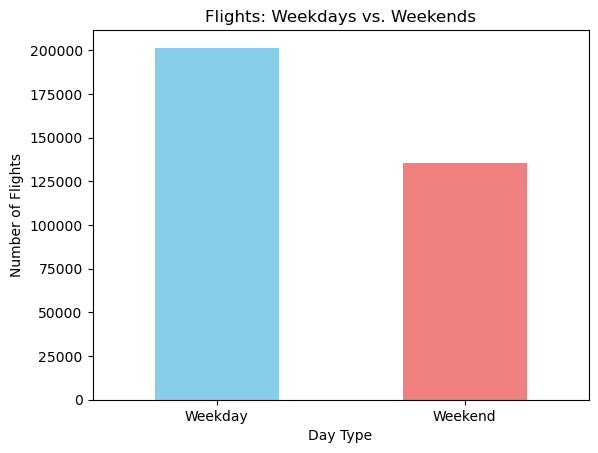

In [41]:
import matplotlib.pyplot as plt

# Group by "day_type" and count flights 
flights_by_day_type = df.groupby('day_type')['flight'].count().compute()

# Create a bar plot
flights_by_day_type.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.xlabel('Day Type')
plt.ylabel('Number of Flights')
plt.title('Flights: Weekdays vs. Weekends')
plt.xticks(rotation=0)
plt.show()

# Q. which origin has most delays

In [42]:
# Filter for delayed flights (e.g., departure delay greater than 0)
delayed_flights = df[df['dep_delay'] > 0]

# Group by origin and count the number of delayed flights
delays_by_origin = delayed_flights.groupby('origin')['flight'].count()

# Compute the grouped data
delays_by_origin = delays_by_origin.compute()


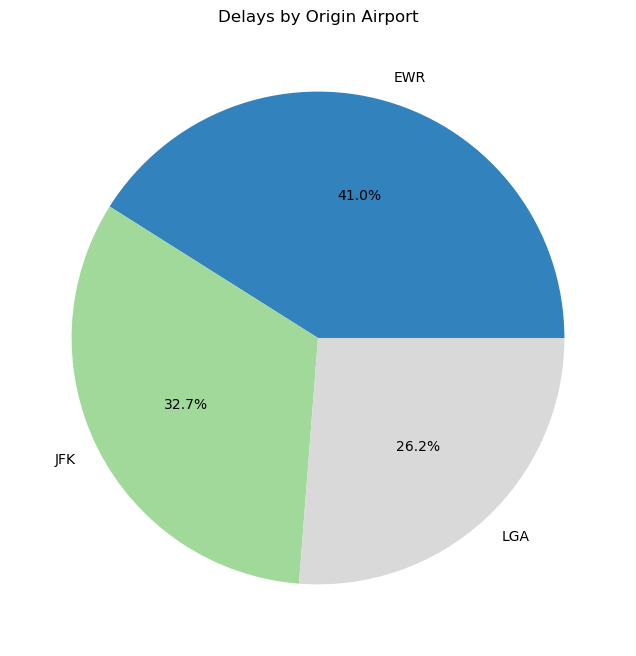

In [43]:
import matplotlib.pyplot as plt

# Plot a pie chart
delays_by_origin.plot(
    kind='pie', 
    autopct='%1.1f%%', 
    figsize=(8, 8), 
    colormap='tab20c'
)
plt.title('Delays by Origin Airport')
plt.ylabel('')  # Remove y-axis label for aesthetics
plt.show()
